In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image(img_path):
    """Read in image."""
    img = skimage.io.imread(img_path)
    img = img[:, :, :3]
    return img


def to_gray(img):
    """Convert to grayscale."""
    bw_img = skimage.color.rgb2gray(img)
    return bw_img


def crop(bw_img):
    """Crop image so pegs are out of frame."""
    cropped = bw_img[500:-100, 300:500]
    return cropped


def mask_and_skeletonize(cropped_img, threshold=0.5):
    """Mask the non snake parts of the image and return the outline."""
    mask = (cropped_img < threshold).astype("uint8")
    skeleton = mask * cropped_img
    return skeleton


def process_and_get_skeleton(img_path):
    """Take in path to image and return skeleton of snake."""
    img = load_image(img_path)
    bw = to_gray(img)
    cropped = crop(bw)
    skeleton = mask_and_skeletonize(cropped)
    return skeleton


def get_skeleton_pixels(skeleton):
    """
    Get pixels describing the shape of the skeleton.

    Parameters
    ----------
    skeleton : np.ndarray
        Cropped 2D image of the snake skeleton.

    Returns
    -------
    skelton_pixels : np.ndarray
        2D array containing values where skeleton pixels are located.
    """
    skeleton_pixels = np.argwhere(skeleton)
    return skeleton_pixels


def get_xy_pixel_coords(pixel_coords):
    """
    Get x and y pixel values separately and create list of coordinates.

    Parameters
    ----------

    pixel_coords : np.ndarray
        Array with pixel coordinate tuples.

    Returns
    -------
    coord_tuples : list
        List of tuples with pixel coordinates.
    """
    x = pixel_coords[:, 1]
    y = pixel_coords[:, 0]
    coord_tuples = list(zip(x, y))
    return coord_tuples

def get_unique_coord_vals(coords):
    """Get the unique x and y coordinates from the coordinate tuples."""
    unique_x = list(set([tup[0] for tup in xy_coords]))
    unique_y = list(set([tup[1] for tup in xy_coords]))
    return np.array(unique_x), np.array(unique_y)

def average_x_for_given_y(y_val, tup_list):
    """Average x pixel value for a given y pixel value."""
    all_x_for_y = [tup[0] for tup in tup_list if tup[1] == y_val]
    length = len(all_x_for_y)
    summed = sum(all_x_for_y)
    avg = summed / length
    return avg

def get_all_avg_x(unique_y, coord_tuples):
    """
    Find the average x pixel for each value of y pixel.
    
    Do it this way because snake curves and looking at unique x doesn't
    mean we are looking at a specific spot on the snake.
    """
    average_x = []
    for y in uni_y:
        avg_x = average_x_for_given_y(y, coord_tuples)
        average_x.append(avg_x)
    average_x = np.array(average_x)
    return average_x

In [3]:
skeleton = process_and_get_skeleton("snake_side.png")
skel_pixels = get_skeleton_pixels(skeleton)
xy_coords = get_xy_pixel_coords(skel_pixels)
uni_x, uni_y = get_unique_coord_vals(xy_coords)

In [5]:
average_x = get_all_avg_x(uni_y, coord_tuples=xy_coords)

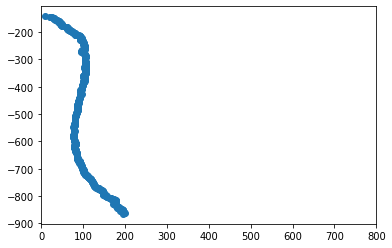

In [6]:
plt.scatter(average_x, -1 * uni_y)
plt.xlim([0, 800])
plt.show()

In [ ]:
img = load_image("snake_side.png")
bw_img = to_gray(img)
cropped = crop(bw_img)

In [ ]:
skimage.io.imshow(cropped)

In [19]:
skeleton_pixels = list(zip(average_x, uni_y))
x_int = np.array([int(x) for x in average_x])

In [22]:
skel = np.zeros((986, 200))

In [31]:
bare_skel_coords = list(zip(uni_y, x_int))

In [32]:
for b in bare_skel_coords:
    skel[b] = 1

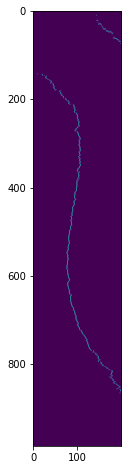

In [36]:
plt.figure(figsize=(8,8))
plt.imshow(skel)